# Likelihood contourf with light minimal model

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from Likelihood import LEff
from mcmc_utils import light_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [4]:
hierarchy = 'light'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

selection = 'cut_based'
set_backend = True
reset_backend = False
n_samples = 10000

spec = 'minimal with geometry and logs'

In [5]:
this_dark_nus_mcmc = light_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance=distance, smoothing_pars=smoothing_pars)
df = this_dark_nus_mcmc.provide_df(selection)

light majorana


In [38]:
ndim = 4
from ctau_utils import ctau_light
from const import alphaQED
def light_minimal_posterior_with_geometry_log_masses(parameters):
    '''Posterior in the light minimal model with no geometry: parameters = [log10_m4, log10_mz, log10_Vmu4, log10_epsilon]
       parameters should be a [..., 4]'''
    actual_pars = 10**parameters
    actual_Vmu4_alpha_epsilon2 = actual_pars[..., 2] * alphaQED * 10**(2*actual_pars[..., 3])
    ctau = ctau_light(actual_pars[..., 0], 
                      actual_pars[..., 1], 
                      actual_pars[..., 2], 
                      D_or_M)[np.newaxis, ...]
    this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
    mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events_v(df=df,
                                                         m4mz=actual_pars[..., 0:1],
                                                         ctau=ctau,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
    return np.where(((parameters[0] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0])) or\
       (parameters[0] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1])) or\
       (parameters[1] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0])) or\
       (parameters[1] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1])) or\
       (parameters[0] <= parameters[1]) or\
       (parameters[2] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4)) or\
       (parameters[3] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon)) or\
       (parameters[3] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon))),
                    np.array((-np.inf, -np.inf, -np.inf, -np.inf)),
                    np.array((LEff(0, mu, sigma2), mu, sigma2, ctau)))

labels = ['log10_m4', 'log10_mz', 'log10_Vmu4', 'log10_epsilon']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [34]:
this_dark_nus_mcmc.exp_analysis_obj.decay_in_tpc_fast_v = np.vectorize(this_dark_nus_mcmc.exp_analysis_obj.decay_in_tpc_fast)

In [41]:
this_dark_nus_mcmc.exp_analysis_obj.kde_n_events_v = np.vectorize(this_dark_nus_mcmc.exp_analysis_obj.kde_n_events, excluded=['df', 
                                                                                                                              'selection_query',
                                                                                                                                'smoothing',
                                                                                                                                'distance',
                                                                                                                                'kernel',])

In [ ]:
actual_pars = 10**parameters
    actual_Vmu4_alpha_epsilon2 = actual_pars[..., 2] * alphaQED * 10**(2*actual_pars[..., 3])
    ctau = ctau_light(actual_pars[..., 0], 
                      actual_pars[..., 1], 
                      actual_pars[..., 2], 
                      D_or_M)[np.newaxis, ...]
    this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2

In [8]:
# Masses BP L2
log10_m4_BP_L2 = np.log10(0.1)
log10_mz_BP_L2 = np.log10(0.03)

In [21]:
log10_Vmu4 = np.linspace(np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4), np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4), 2)
log10_epsilon = np.linspace(np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon), np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon), 3)

In [22]:
X, Y = np.meshgrid(log10_Vmu4, log10_epsilon)

In [29]:
pars = np.stack((log10_m4_BP_L2*np.ones(X.shape), log10_mz_BP_L2*np.ones(X.shape), X, Y), axis=-1)

In [30]:
pars.shape

(2, 2, 4)

In [ ]:
Z1 = light_minimal_posterior_with_geometry_log_masses(X, Y)

In [79]:
ndim = 4
from ctau_utils import ctau_light
from const import alphaQED
def light_minimal_posterior_with_geometry_log_masses(parameters):
    '''Posterior in the light minimal model with no geometry: parameters = [log10_m4, log10_mz, log10_Vmu4, log10_epsilon]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0])) or\
       (parameters[0] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1])) or\
       (parameters[1] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0])) or\
       (parameters[1] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1])) or\
       (parameters[0] < parameters[1]) or\
       (parameters[2] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4)) or\
       (parameters[3] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon)) or\
       (parameters[3] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon)):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_m4 = 10**parameters[0]
        actual_mz = 10**parameters[1]
        actual_Vmu4 = 10**parameters[2]
        actual_Vmu4_alpha_epsilon2 = actual_Vmu4 * alphaQED * 10**(2*parameters[3])
        ctau = ctau_light(actual_m4, 
                          actual_mz, 
                          actual_Vmu4, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(actual_m4, actual_mz),
                                                         ctau=ctau,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['log10_m4', 'log10_mz', 'log10_Vmu4', 'log10_epsilon']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [8]:
# Masses BP L2
log10_m4_BP_L2 = np.log10(0.1)
log10_mz_BP_L2 = np.log10(0.03)

In [65]:
log10_Vmu4 = np.linspace(np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4), np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4), 5)
log10_epsilon = np.linspace(np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon), np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon), 3)

In [66]:
X, Y = np.meshgrid(log10_Vmu4, log10_epsilon)

In [67]:
pars = np.stack((log10_m4_BP_L2*np.ones(X.shape), log10_mz_BP_L2*np.ones(X.shape), X, Y), axis=-1)

In [68]:
leff = np.ones([*X.shape, 4])

In [80]:
for i in range(len(log10_Vmu4)):
    for j in range(len(log10_epsilon)):    
        leff[j, i] = light_minimal_posterior_with_geometry_log_masses(pars[j, i])

In [83]:
total = np.concatenate((pars, leff), axis=-1)

In [93]:
total2 = total.reshape(-1, 8)

In [95]:
total2[0]

array([-1.00000000e+00, -1.52287875e+00, -1.00000000e+01, -5.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.26982872e-04])

In [96]:
import pandas as pd

In [97]:
aux = pd.DataFrame(total2, columns=[*labels, 'log(p)', 'mu', 'sigma2', 'ctau'])

In [98]:
aux

,log10_m4,log10_mz,log10_Vmu4,log10_epsilon,log(p),mu,sigma2,ctau
0,-1.0,-1.522879,-10.000000,-5.000000,0.0,0.0,0.0,7.269829e-04
1,-1.0,-1.522879,-7.880720,-5.000000,0.0,0.0,0.0,5.523875e-06
2,-1.0,-1.522879,-5.761439,-5.000000,0.0,0.0,0.0,4.197238e-08
3,-1.0,-1.522879,-3.642159,-5.000000,0.0,0.0,0.0,3.189211e-10
4,-1.0,-1.522879,-1.522879,-5.000000,0.0,0.0,0.0,2.423276e-12
5,-1.0,-1.522879,-10.000000,-3.150515,0.0,0.0,0.0,7.269829e-04
6,-1.0,-1.522879,-7.880720,-3.150515,0.0,0.0,0.0,5.523875e-06
7,-1.0,-1.522879,-5.761439,-3.150515,0.0,0.0,0.0,4.197238e-08
8,-1.0,-1.522879,-3.642159,-3.150515,0.0,0.0,0.0,3.189211e-10
9,-1.0,-1.522879,-1.522879,-3.150515,0.0,0.0,0.0,2.423276e-12


In [95]:
from getdist import plots, MCSamples
from mcmc_utils import labels_fancy

In [96]:
samples = MCSamples(samples=this_dark_nus_mcmc.samples.values,
                    names=this_dark_nus_mcmc.samples.columns,
                    labels=[labels_fancy[lab].replace('$', '') if lab in labels_fancy.keys() else lab for lab in this_dark_nus_mcmc.samples.columns],
                    ranges={'m4': this_dark_nus_mcmc.exp_analysis_obj.m4_limits,
                            'mz': this_dark_nus_mcmc.exp_analysis_obj.mz_limits,
                            'log10_m4': [np.log10(lim) for lim in this_dark_nus_mcmc.exp_analysis_obj.m4_limits],
                            'log10_mz': [np.log10(lim) for lim in this_dark_nus_mcmc.exp_analysis_obj.mz_limits],
                            'log10_Vmu4_alpha_epsilon2': (this_dark_nus_mcmc.exp_analysis_obj.lower_bound_log10_Vmu4_alpha_epsilon2, 
                                 this_dark_nus_mcmc.exp_analysis_obj.upper_bound_log10_Vmu4_alpha_epsilon2)},
                    settings={'boundary_correction_order':0, 'mult_bias_correction_order':1., 'contours': [0.68]})

Removed no burn in


# g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.95]})
g.settings.num_plot_contours = 1
g.plot_2d(samples, 'm4', 'mz');

((0.005, 1.0), (0.005, 10.0))

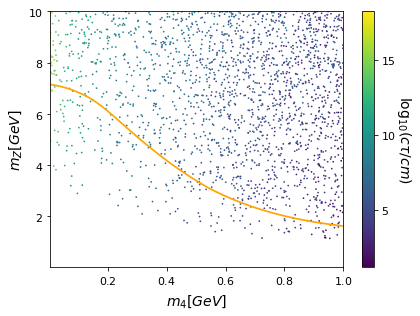

In [101]:
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.9]})
g.settings.num_plot_contours = 1
g.plot_3d(samples, ['m4', 'mz', 'log10_ctau'])
g.plot_2d(samples, 'm4', 'mz', colors=['orange'])

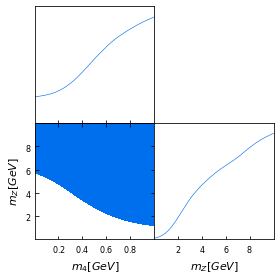

In [75]:
g = plots.get_subplot_plotter()
samples.updateSettings({'contours': [0.95]})
g.settings.num_plot_contours = 1
g.triangle_plot(samples, ['m4', 'mz'], filled=True)

[(0.005, 10.0), (-15.0, -8.748885462081107)]

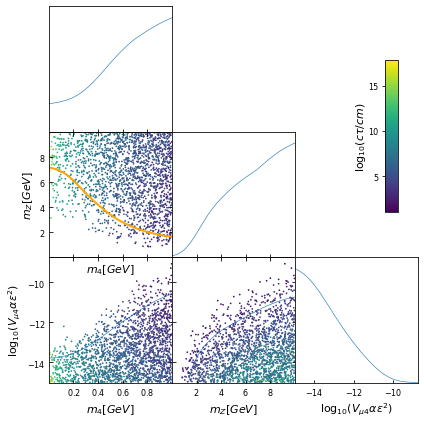

In [105]:
# from getdist.styles.tab10 import style_name
# plots.set_active_style(style_name)

g = plots.get_subplot_plotter()
samples.updateSettings({'contours': [0.9]})
g.settings.num_plot_contours = 1
# g.triangle_plot(samples, ['m4', 'mz', 'log10_Vmu4_alpha_epsilon2'])
g.triangle_plot(samples, ['m4', 'mz', 'log10_Vmu4_alpha_epsilon2'], plot_3d_with_param='log10_ctau', colors=['orange'], lws=[2])
g.plot_2d(samples, 'm4', 'mz', ax = [1, 0], colors=['orange'], lws=[2])
g.add_2d_contours(samples, 'm4', 'log10_Vmu4_alpha_epsilon2', ax = [2, 0])
g.add_2d_contours(samples, 'mz', 'log10_Vmu4_alpha_epsilon2', ax = [2, 1])

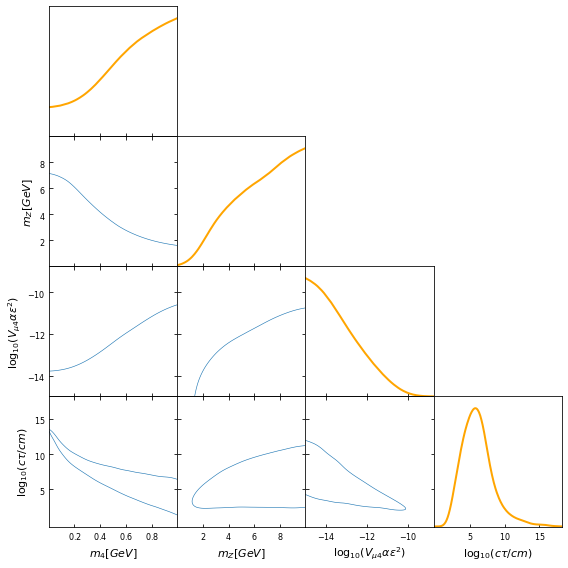

In [125]:
# from getdist.styles.tab10 import style_name
# plots.set_active_style(style_name)

g = plots.get_subplot_plotter()
samples.updateSettings({'contours': [0.9]})
g.settings.num_plot_contours = 1
g.triangle_plot(samples, ['m4', 'mz', 'log10_Vmu4_alpha_epsilon2', 'log10_ctau'], 
#                 plot_3d_with_param='log10_ctau',
                line_args={'ls':'-', 'color':'orange', 'lw':2})
# g.add_2d_contours(samples, )

In [11]:
from getdist import plots, MCSamples
from mcmc_utils import labels_fancy

In [12]:
samples = MCSamples(samples=this_dark_nus_mcmc.samples.values,
                    names=this_dark_nus_mcmc.samples.columns,
                    labels=[labels_fancy[lab].replace('$', '') if lab in labels_fancy.keys() else lab for lab in this_dark_nus_mcmc.samples.columns],
                    ranges={'m4': this_dark_nus_mcmc.exp_analysis_obj.m4_limits,
                            'mz': this_dark_nus_mcmc.exp_analysis_obj.mz_limits,
                            'log10_m4': [np.log10(lim) for lim in this_dark_nus_mcmc.exp_analysis_obj.m4_limits],
                            'log10_mz': [np.log10(lim) for lim in this_dark_nus_mcmc.exp_analysis_obj.mz_limits],
                            'log10_Vmu4_alpha_epsilon2': (this_dark_nus_mcmc.exp_analysis_obj.lower_bound_log10_Vmu4_alpha_epsilon2, 
                                 this_dark_nus_mcmc.exp_analysis_obj.upper_bound_log10_Vmu4_alpha_epsilon2)},
                    settings={'boundary_correction_order':0, 'mult_bias_correction_order':1., 'contours': [0.9]})

Removed no burn in


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


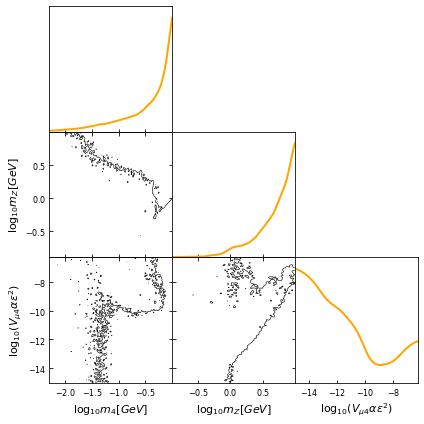

In [16]:
# from getdist.styles.tab10 import style_name
# plots.set_active_style(style_name)

g = plots.get_subplot_plotter()
# samples.updateSettings({'contours': [0.9]})
# g.settings.num_plot_contours = 1
g.triangle_plot(samples, ['log10_m4', 'log10_mz', 'log10_Vmu4_alpha_epsilon2'], 
#                 plot_3d_with_param='log10_ctau',
                line_args={'ls':'-', 'color':'orange', 'lw':2})
# g.add_2d_contours(samples, )

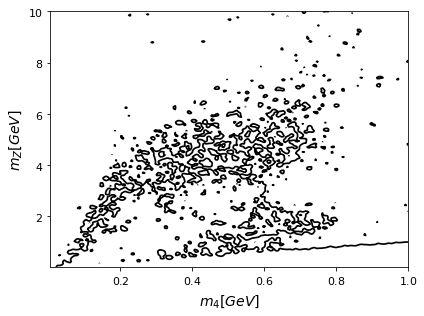

In [18]:
g = plots.get_single_plotter()
# samples.updateSettings({'contours': [0.9]})
# g.settings.num_plot_contours = 1
g.smooth_scale_2D = 0.3
g.plot_2d(samples, 'm4', 'mz');

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


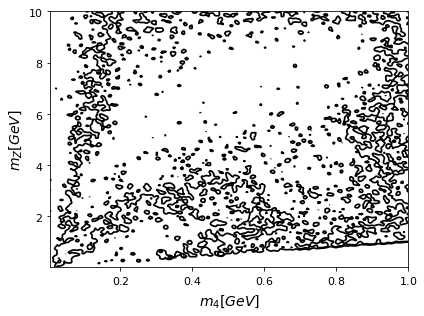

In [22]:
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.3, 0.95]})
g.settings.num_plot_contours = 2
g.smooth_scale_2D = 30
g.plot_2d(samples, 'm4', 'mz');